In [9]:
# data generation
n = 500
p = 10 
c = 4
x,y = make_blobs(n_samples=n,n_features=p,centers=c)

#### building the initial affinities 

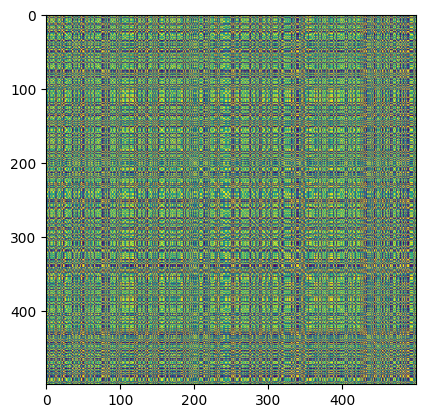

In [12]:
from src.similarity import *

# initial partition over the features
partition = [list(range(p))]
row_sim = CorrelationSimilarity()(x,partition)

plt.imshow(row_sim)

In [13]:
from diffusion_map import DiffusionMap

In [14]:
# build the spectral embedding of the rows

row_emb = DiffusionMap(row_sim, 10).transform(t=1)

In [17]:
# build the tree based on the spectral embedding of the rows
from src.tree.tree_node import TreeNode

In [18]:
root = TreeNode(row_emb,)

In [ ]:
# build the partition 
from sklearn.cluster import KMeans

def kmeans2partition(kmeans: KMeans):
    
    '''
    given a kmeans object, return a list of lists of indices, sorted by label. 
    '''
    partition = kmeans.labels_
    groups = defaultdict(list)
    for idx, label in enumerate(partition):
        groups[label].append(idx)
    # Convert to a list of groups (lists of indices), sorted by label
    return groups

kmeans = KMeans(n_clusters=2).fit(root.data)
partition_groups = kmeans2partition(kmeans)

In [ ]:
for p in partition_groups:
    # make a new node
    node = TreeNode(data=root.data[p])
    
    # add the node to the tree 
    root.add_child(node)
    
    
    
    
    
    
    
    